In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.graph_objects as pgo
import matplotlib_inline
from plotly.subplots import make_subplots
import plotly.express as px
import geopandas as gpd
from matplotlib import cm, colors

Data loading and cleaning

In [2]:
census_data = pd.read_csv(r'C:\Users\HITESH KOTIAN\OneDrive\Desktop\Project\Census_csv\India Census 2011 Data.csv')
census_data.sample(10)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
359,360,JHARKHAND,Hazaribagh,1734495,890881,843614,1013249,654636,423472,231164,...,17137,1312,71,1676,173378,99945,79898,1107452,396466,230033
474,475,GUJARAT,Surendranagar,1756268,909917,846351,1093626,723500,504038,219462,...,1419,512,312,22992,172947,61164,58389,1033435,439352,280582
98,99,RAJASTHAN,Ganganagar,1969168,1043340,925828,1193343,912672,596320,316352,...,2077,474853,938,1988,163098,105734,104071,1167889,502211,283484
571,572,KARNATAKA,Bangalore,9621551,5022661,4598890,7512276,4246927,3115361,1131566,...,504863,13254,5531,83090,2018079,1196965,1733274,5275666,2909575,1424195
238,239,BIHAR,Jehanabad,1125313,585582,539731,618881,365378,266423,98955,...,691,148,248,60,112966,68748,45519,714244,254582,155106
347,348,JHARKHAND,Kodarma,716259,367222,349037,390249,257418,173993,83425,...,1221,944,32,980,52622,26415,20907,462098,158603,95309
579,580,KARNATAKA,Yadgir,1174271,590329,583942,510003,547696,317135,230561,...,8677,331,7970,1519,73599,40104,27728,738451,267222,168186
473,474,GUJARAT,Ahmadabad,7214225,3788051,3426174,5435760,2594952,2127547,467405,...,50754,14542,4518,209287,1135058,549188,839295,3952858,2043895,1198152
344,345,WEST BENGAL,Purba Medinipur,5095875,2629834,2466041,3923194,1910320,1516096,394224,...,2648,746,317,574,444668,236549,184225,2866678,1384242,842025
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488


In [3]:
census_data.isnull().sum()

District_code           0
State_name              0
District_name           0
Population              0
Male                    0
Female                  0
Literate                0
Workers                 0
Male_Workers            0
Female_Workers          0
Cultivator_Workers      0
Agricultural_Workers    0
Household_Workers       0
Hindus                  0
Muslims                 0
Christians              0
Sikhs                   0
Buddhists               0
Jains                   0
Secondary_Education     0
Higher_Education        0
Graduate_Education      0
Age_Group_0_29          0
Age_Group_30_49         0
Age_Group_50            0
dtype: int64

In [4]:
census_data.shape

(640, 25)

In [5]:
census_data.describe()

,District_code,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,7.529514e+05,5.186561e+05,2.342953e+05,1.856387e+05,2.255513e+05,...,4.346811e+04,3.255174e+04,13192.143750,6955.864062,2.051046e+05,1.241736e+05,1.090132e+05,1.102826e+06,4.820189e+05,3.001005e+05
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,6.071622e+05,4.412388e+05,1.913541e+05,1.514895e+05,2.216222e+05,...,1.087273e+05,1.603859e+05,56347.946567,23624.010655,2.164778e+05,1.304154e+05,1.502260e+05,8.887434e+05,4.183230e+05,2.549556e+05
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,3.555000e+03,2.228000e+03,1.327000e+03,0.000000e+00,0.000000e+00,...,1.710000e+02,3.000000e+00,1.000000,0.000000,8.090000e+02,6.560000e+02,3.560000e+02,5.113000e+03,2.088000e+03,7.860000e+02
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,3.284688e+05,2.294168e+05,9.420350e+04,7.491025e+04,5.284175e+04,...,1.951750e+03,2.537500e+02,163.750000,124.750000,7.078575e+04,4.234700e+04,2.799200e+04,4.786540e+05,2.101965e+05,1.193285e+05
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,6.223410e+05,4.288515e+05,1.929265e+05,1.501250e+05,1.645300e+05,...,6.079500e+03,7.375000e+02,372.000000,741.000000,1.523325e+05,8.998700e+04,6.624350e+04,8.896820e+05,3.905085e+05,2.421020e+05
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,1.036544e+06,6.991510e+05,3.163658e+05,2.553015e+05,3.258982e+05,...,2.750850e+04,2.800000e+03,1942.500000,4150.750000,2.629160e+05,1.583555e+05,1.299488e+05,1.491204e+06,6.525142e+05,4.045875e+05
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.492767e+06,3.363123e+06,1.239177e+06,1.013050e+06,1.227956e+06,...,1.248137e+06,1.863408e+06,668050.000000,343639.000000,2.018079e+06,1.196965e+06,1.733274e+06,6.184519e+06,3.241888e+06,1.921143e+06


Population by Gender in Each State

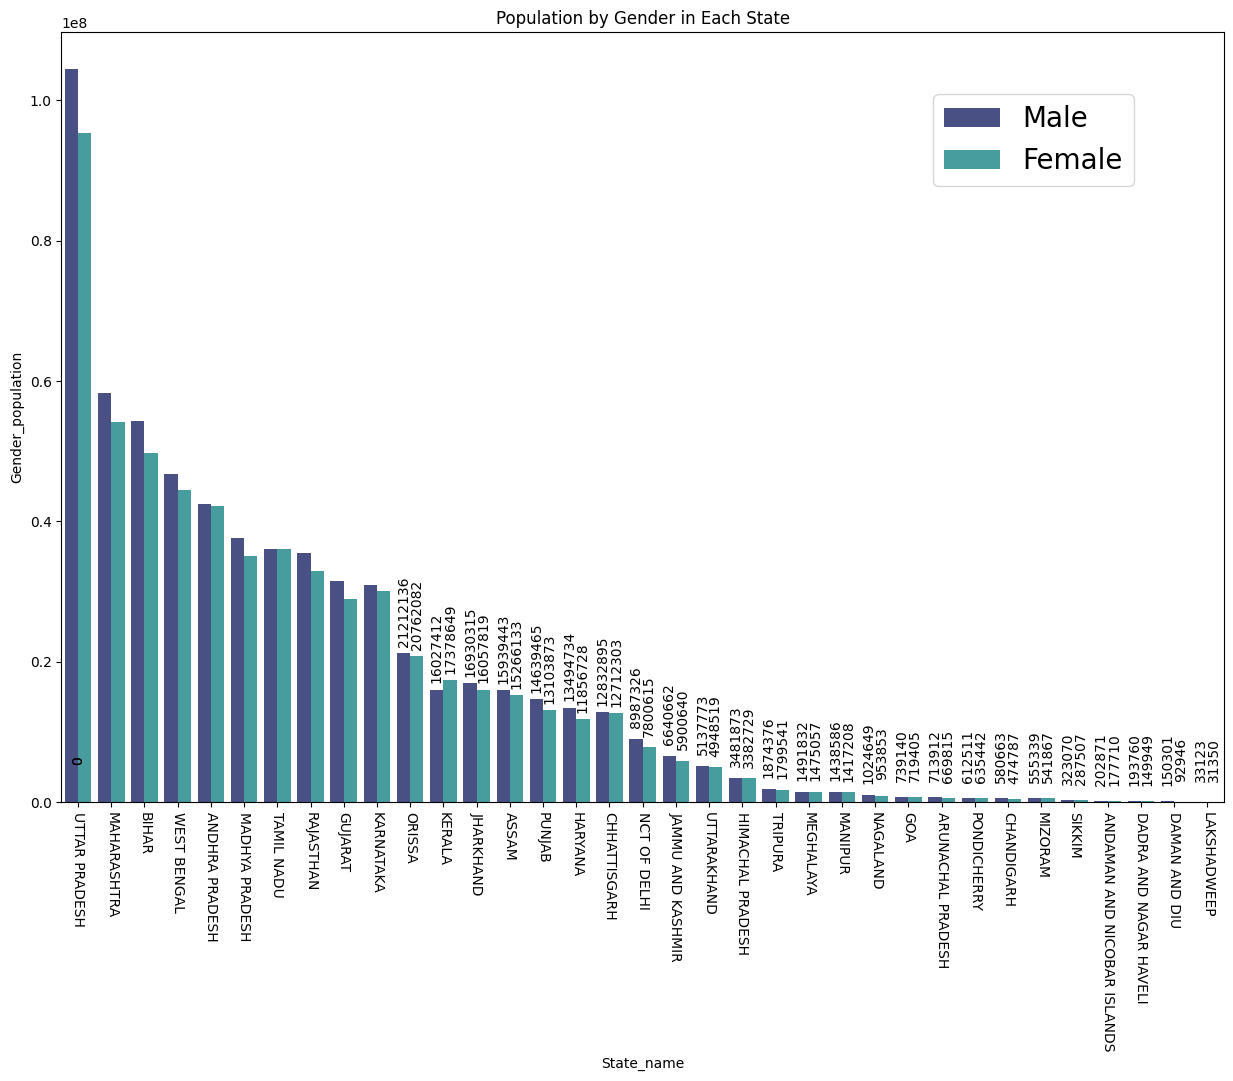

In [6]:
melted_data = census_data.melt(id_vars= ['State_name'], value_vars= ['Male','Female'],
                               var_name='Gender', value_name= 'Gender_population')

group_melted_data = melted_data.groupby(by = ['State_name','Gender'], as_index= False)['Gender_population'].sum()
group_melted_data_sort = group_melted_data.sort_values(by = 'Gender_population', ascending= False)

fig, ax = plt.subplots(figsize = (15,10))

sn.barplot(group_melted_data_sort, x='State_name', y = 'Gender_population',hue = 'Gender', palette='mako')
for p in ax.patches:
  if p.get_height() < 0.25*1e8 :
    ax.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', va = 'center',
              xytext = (0, 30), 
              textcoords = 'offset points', rotation = 90)
plt.xticks(rotation = 270)
plt.title('Population by Gender in Each State')
plt.legend(fontsize = 20, loc =(0.75,0.8))
# plt.tight_layout()
plt.show()




The state named UTTAR PRADESH has the highest population, almost double that of the state following it, MAHARASHTRA.<br> LAKSHADWEEP has the lowest population among all the states <br> TAMIL NADU suprisingly has the equal MALE and FEMALE population.<br> KERALA and PONDICHERRY are the only states which have the FEMALE population more than MALE population. 

In [7]:
Religion_data = census_data[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']]
group_religion_Data = Religion_data.sum()

# fig,ax = plt.subplots(figsize = (15,10))
fig = pgo.Figure(pgo.Pie(values = group_religion_Data, labels = group_religion_Data.index ))
fig.update_layout(title = {'text' : 'Religion Distribution of India',
        'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
        title_font_color = 'RebeccaPurple', font=dict(size=20))
fig.update_traces(textfont_size = 12,hole = 0.25,textinfo = 'label+percent',
                   marker =dict(line=dict(color='#000000', width=0.5)))
fig.show()


Hinduism is the most followed faith in India. Which is followed by Muslims and Christians by 14 and 2.3 percent, respectively. Sikh is just below 2%; Buddhism and Jainism combine to merely 1%.

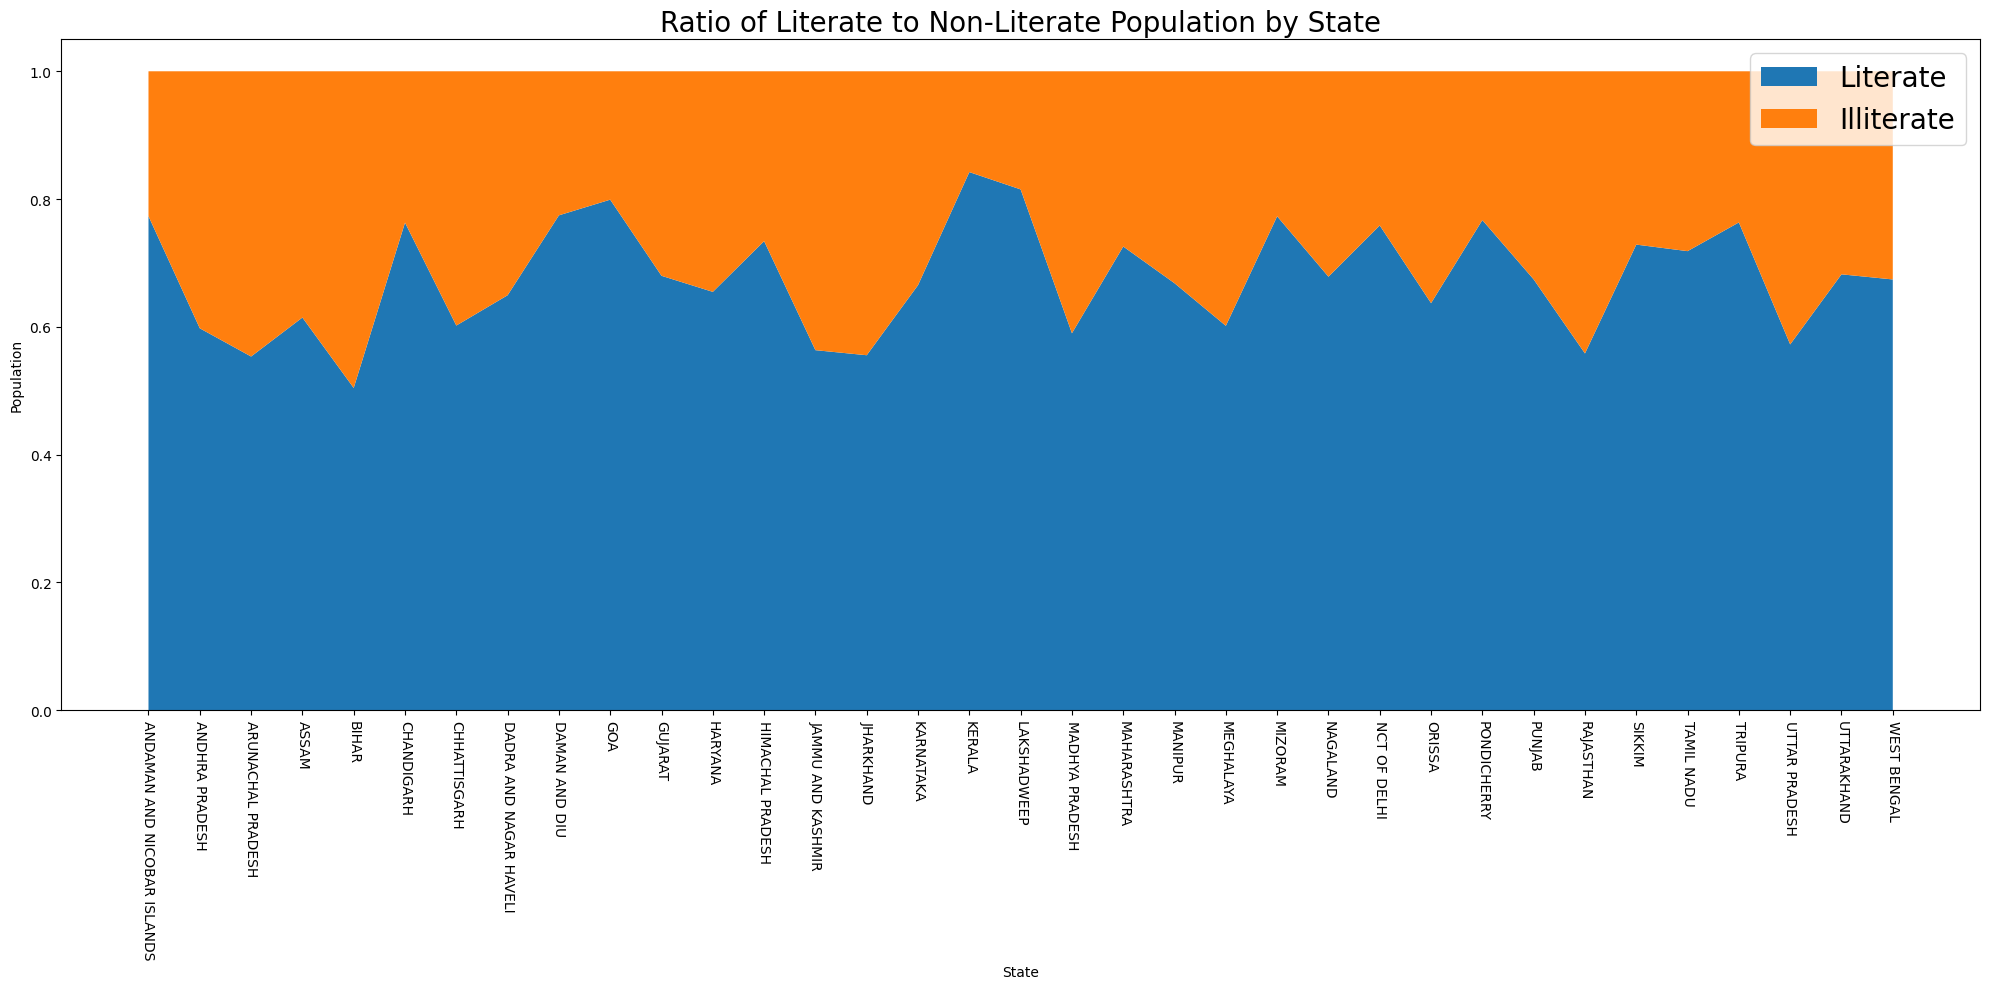

In [8]:
pop = census_data.groupby(['State_name'])['Population'].sum()
pop_lit = census_data.groupby(['State_name'])['Literate'].sum()

pop_graph = pd.DataFrame(
    {'Population' :pop,
     'Literate' : pop_lit})
pop_graph = pop_graph.reset_index()
Literate_ratio = pop_graph['Literate'] / pop_graph['Population']
Illiterate = 1 - Literate_ratio


plt.figure(figsize=(20,10))
plt.stackplot(pop_graph['State_name'],Literate_ratio,Illiterate , labels= ['Literate', 'Illiterate'])
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Ratio of Literate to Non-Literate Population by State', fontdict=dict(size = 20))
plt.legend(fontsize = 20)
plt.xticks(rotation = 270)
plt.tight_layout()

BIHAR shows a higher illiteracy ratio than literacy.<br> JHARKHAND, RAJASTHAN, and UTTAR PRADESH show a similar literacy ratio, which is higher than BIHAR but lower than the other states.<br> Kerala has the highest literacy rate of all the states.<br> Among the Seven Sisters of India, Meghalaya shows the least literacy among them. 

Mapping of Agricultural and Cultivator worker

In [9]:
# India's Map with district  
# Load the shapefile
geo_census_data = gpd.read_file(r'C:\Users\HITESH KOTIAN\OneDrive\Desktop\Project\Census_csv\India_district\DISTRICT_BOUNDARY.shp')

# Some terms need to be replaced 

geo_census_data =  geo_census_data.replace('[>@]','A',regex= True)
geo_census_data =  geo_census_data.replace('[|]','i',regex= True)

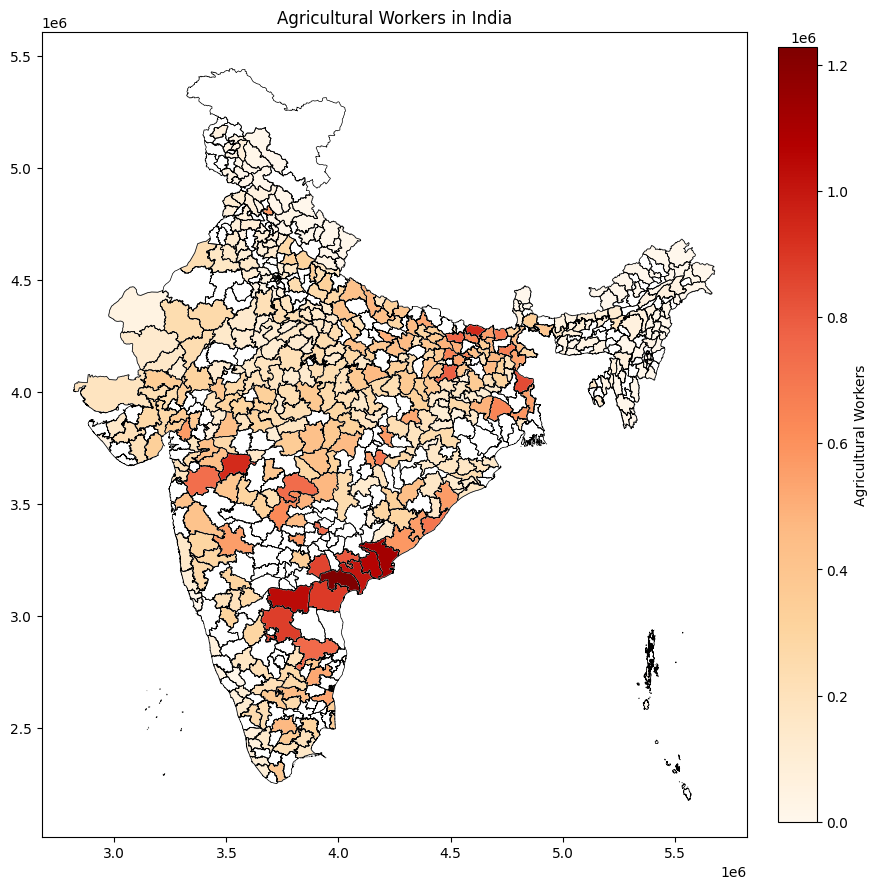

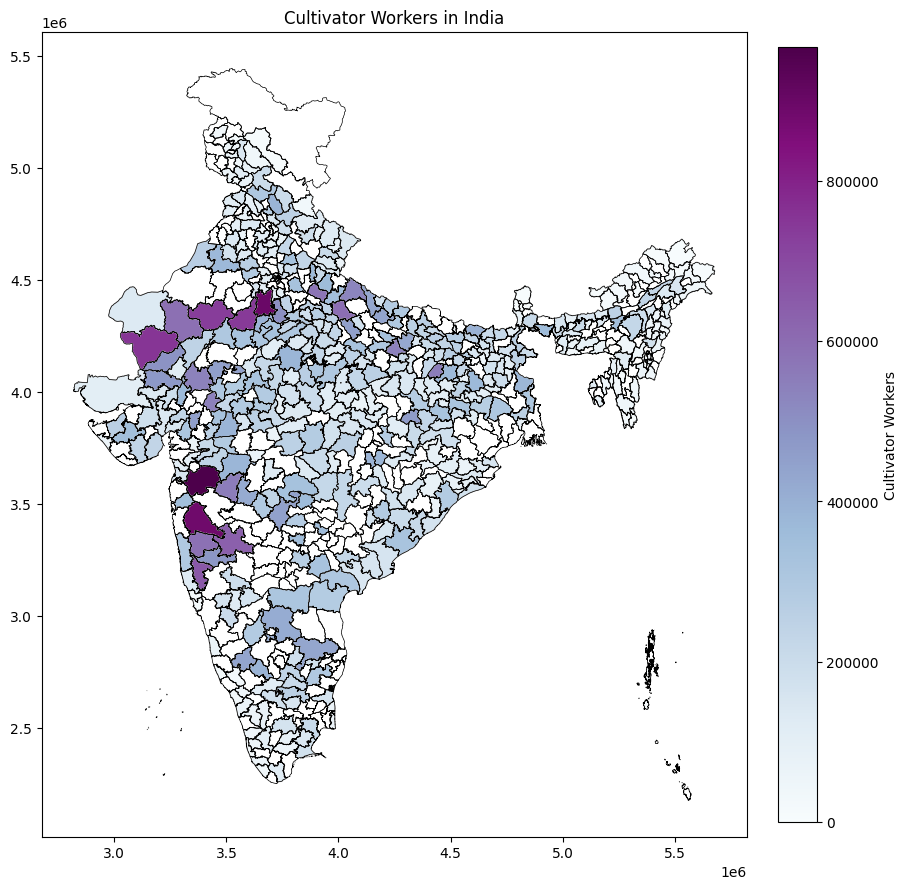

In [10]:
data = census_data[['District_code', 'State_name', 'District_name', 'Cultivator_Workers', 'Agricultural_Workers']]
census_data_district = pd.DataFrame(data)

census_data_district['District_name'] = census_data_district['District_name'].str.upper()

# Merge your data with the geospatial data
gdf = geo_census_data.merge(census_data_district, left_on='District', right_on='District_name')


# Agricultural Workers Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
gdf.plot(column='Agricultural_Workers', cmap='OrRd', linewidth=0.8, edgecolor='0.8', ax =ax)

geo_census_data.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black') #for border of India

norm = colors.Normalize(vmin=gdf['Agricultural_Workers'].min(), vmax=gdf['Agricultural_Workers'].max())
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label('Agricultural Workers')
ax.set_title('Agricultural Workers in India')
plt.show()

# Cultivator Workers Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
gdf.plot(column='Cultivator_Workers', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.8')

geo_census_data.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black') #for border of India

norm = colors.Normalize(vmin=gdf['Cultivator_Workers'].min(), vmax=gdf['Cultivator_Workers'].max())
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label('Cultivator Workers')
ax.set_title('Cultivator Workers in India')
plt.show()


First Plot -
Agricultural workers are widely distributed in all over INDIA except of few regions.<br>
ANDRA PRADESH has the most concentration of agricultural worker at the streached part below the CHATTISGARH and TELANGANA.<BR>
Patches of BIHAR and MAHARASHTRA show the deep concentration of Agricultural workers <br>
Border of ODISHA and WEST BENGAL, most of the part of KARNATAKA, Norther region of RAJASTHAN show the very few Agricultural workers 

Second Plot - 
Most of the None distrubuted area as of Agricultural workers are same for Cultivator workers.<br>
Except for denser concentration is in MAHARASHTRA and Central band of RAJASTHAN 

In [11]:
age_50_group = census_data.groupby('State_name')['Age_Group_50'].sum()
age_below_30_grp = census_data.groupby('State_name')['Age_Group_0_29'].sum()

age_50_group_sort = age_50_group.sort_values(ascending=False)
age_below_30_grp_sort = age_below_30_grp.reindex(age_50_group_sort.index)

# Combined Graph
graph = pgo.Figure()

graph.add_trace(pgo.Scatter(x= age_50_group_sort.index, y =age_50_group_sort.values, mode = 'lines+markers',
                            name = 'Age Group above 50',
                            marker = dict(colorscale = 'sunset',
                                          color = 'rgba(8, 8, 8, 1)',
                                          line = dict(color = 'rgba(7, 181, 255, 1)',
                                                      width = 1.5),
                                          size = 5) ))

graph.add_trace(pgo.Bar(x= age_below_30_grp_sort.index, y = age_below_30_grp_sort.values,
                        name = 'Age Group below 30',
                        marker = dict(color = 'rgb(104, 186, 71)') ))
      

graph.update_layout(title = 'Age comparision of Above 50 and Below 30 population',
                    xaxis_title = 'State Name',
                    yaxis_title = 'Population',
                    legend_title = 'Age Groups',
                    legend = dict(x =0.8, y = 1),
                    font = dict(size = 12),
                    autosize=False, width=1000, height=1000)

graph.show()



Most of the Indian state tends to have 3 times the population of below 30 age group than the age group of above 50<br>
Some states like TAMIL NADU, KERALA, PUNJAB, HIMACHAL PRADESH AND TRIPURA shows the 2 times the population ratio of below 30 age group to above 50 age group. <br>
ANDHRA PRADESH and MAHARASHTRA has the most senior age group people respectively.<BR>
MEGHALAYA and NAGALAND shows the biggest ratio, MEGHALAYA has 10 times the below age 30 group than above age 50 group.
